# Projeto Bônus

A partir da adoção de um sistema de bandejas, será formulado um modelo cálculo para meta de recomendações semanais convertidas em vendas por uma equipe de baristas.

## Importando arquivos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
!pip install openpyxl


[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_excel('Controle de bandejas.xlsx')
df

c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,26,33.92,310,1185,8.862233,7.106237,396.368520,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,27,33.92,310,1184,8.872677,7.412368,986.444517,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857.375154,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881.167437,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013.036839,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2024,5,48.89,287,1221,11.475168,15.913512,551.842051,81,7.233010,...,0.234714,-0.338665,0.029876,0.622207,0.142105,0.081085,0.083818,0.040909,0.013281,1.013281
84,2024,6,48.89,287,1159,12.088265,14.989052,689.423177,54,11.746930,...,0.247254,0.249313,0.053406,0.641905,0.098007,0.095981,0.071874,0.038826,0.017334,1.017334
85,2024,7,48.89,215,988,10.630913,14.212922,969.330688,61,0.000000,...,0.217446,0.406002,0.048439,0.586140,0.156179,0.089488,0.063809,0.055945,0.000000,1.000000
86,2024,8,51.54,204,895,11.733722,14.788333,901.323551,48,5.710038,...,0.227662,-0.070159,0.037268,0.621569,0.152033,0.094610,0.048312,0.046208,0.006376,1.006376


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ano                             88 non-null     int64  
 1   Semana                          88 non-null     int64  
 2   Ideal, valor                    88 non-null     float64
 3   Meta ideal                      88 non-null     int64  
 4   Meta ajustada                   88 non-null     int64  
 5   Semanal, valor                  88 non-null     float64
 6   Recomendada, valor              88 non-null     float64
 7   vendas realizadas (bandejas)    88 non-null     float64
 8   total de conversões             88 non-null     int64  
 9   Equiv. product line             88 non-null     float64
 10  Conversões + Equiv. Prod. Line  88 non-null     float64
 11  meta de conversões              88 non-null     float64
 12  Dif. Meta/conversões            88 non

## Análise Univariada

Não foi necessária análise de nulos, pois o dataframe foi construído sem nulos por este que vos fala.

In [5]:
df['vendas realizadas (bandejas)'] = df['vendas realizadas (bandejas)'].astype('int')
df

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,26,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2024,5,48.89,287,1221,11.475168,15.913512,551,81,7.233010,...,0.234714,-0.338665,0.029876,0.622207,0.142105,0.081085,0.083818,0.040909,0.013281,1.013281
84,2024,6,48.89,287,1159,12.088265,14.989052,689,54,11.746930,...,0.247254,0.249313,0.053406,0.641905,0.098007,0.095981,0.071874,0.038826,0.017334,1.017334
85,2024,7,48.89,215,988,10.630913,14.212922,969,61,0.000000,...,0.217446,0.406002,0.048439,0.586140,0.156179,0.089488,0.063809,0.055945,0.000000,1.000000
86,2024,8,51.54,204,895,11.733722,14.788333,901,48,5.710038,...,0.227662,-0.070159,0.037268,0.621569,0.152033,0.094610,0.048312,0.046208,0.006376,1.006376


In [6]:
df.describe()

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,2022.795455,28.136364,44.690341,246.340909,1050.863636,10.435364,13.276048,907.352273,52.340909,26.002786,...,0.234358,0.022721,0.027237,0.671354,0.113474,0.112906,0.031276,0.043753,0.030259,1.030259
std,0.609486,15.740118,4.048844,27.230344,98.629363,0.778719,2.299886,164.659247,21.789951,19.966152,...,0.015497,0.211252,0.011326,0.055199,0.052352,0.021982,0.016299,0.006147,0.023281,0.023281
min,2022.000000,1.000000,33.920000,204.000000,843.000000,8.611724,0.000000,396.000000,0.000000,0.000000,...,0.212955,-0.338665,0.000000,0.572405,0.000000,0.026484,0.012478,0.029500,0.000000,1.000000
25%,2022.000000,13.750000,41.340000,232.000000,1000.500000,9.901707,12.638540,796.750000,36.500000,12.223304,...,0.223238,-0.072577,0.020476,0.635229,0.099434,0.100732,0.020764,0.039853,0.013739,1.013739
50%,2023.000000,30.500000,45.300000,232.000000,1038.500000,10.316699,13.514897,904.500000,50.500000,22.527479,...,0.230131,-0.000053,0.023809,0.651754,0.130121,0.111955,0.027279,0.043466,0.023502,1.023502
75%,2023.000000,41.250000,48.890000,259.000000,1077.500000,11.114408,14.702456,1014.750000,68.250000,35.394917,...,0.242557,0.077174,0.033495,0.689639,0.153211,0.127128,0.036691,0.047478,0.041277,1.041277
max,2024.000000,52.000000,51.540000,310.000000,1284.000000,12.459713,16.690074,1306.000000,119.000000,92.065858,...,0.301396,1.488706,0.054907,0.806860,0.180491,0.182273,0.097513,0.056307,0.118857,1.118857


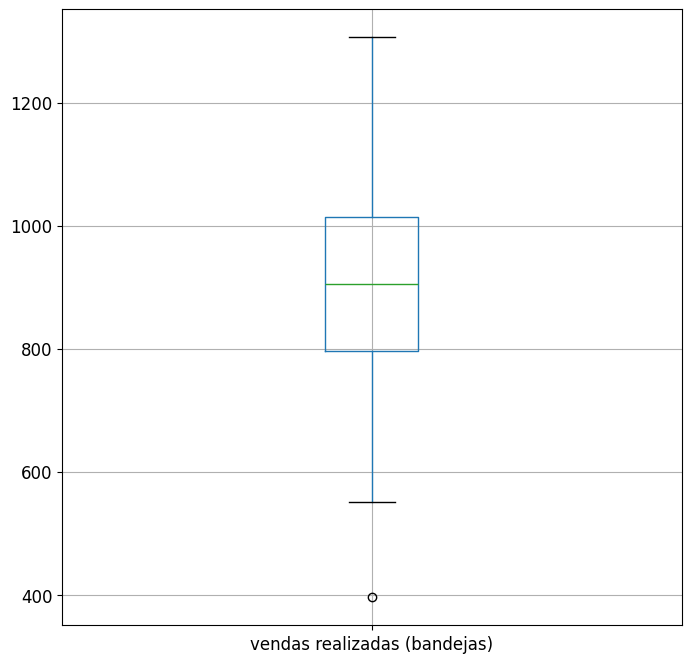

In [7]:
df.boxplot('vendas realizadas (bandejas)',figsize= (8,8), fontsize='large');

In [8]:
df.boxplot('total de conversões',figsize= (8,8), fontsize='large');

### Criando marcação de data

Formato isocalendar: (YYYY,WW,D), onde o primeiro dia da semana é segunda, e o último é domingo. Como no BI a semana começa na segunda e termina no domingo, os dados de cada semana ficam acumulados para o domingo (i.e. weekday = 7).

É preciso criar uma coluna de data, formando a tupla isocalendar com a coluna ano, combinada com a coluna semana, combinada com o número 7 e aplicando a função date.fromisocalendar(year, week, day).

Primeiro será criada a coluna isoformat, depois a coluna data.

In [9]:
def create_date_from_year_week(year, week):
    """ creates timestamp object from year and week numbers, standardized day is Sunday"""
    return pd.Timestamp.fromisocalendar(year, week, 7)

In [10]:
create_date_from_year_week(2022, 32)

Timestamp('2022-08-14 00:00:00')

In [11]:
dataframe_copy = df.copy() #criando uma cópia para manipulação dos dados de análise
year = dataframe_copy['Ano']
week = dataframe_copy['Semana']
date_year_week = lambda x,y: create_date_from_year_week(x,y)
date = list(map(date_year_week, year, week))
dataframe_copy['date']= pd.Series(date)
dataframe_copy

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S),date
0,2022,26,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010,2022-07-03
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888,2022-07-10
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776,2022-07-17
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450,2022-07-24
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930,2022-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2024,5,48.89,287,1221,11.475168,15.913512,551,81,7.233010,...,-0.338665,0.029876,0.622207,0.142105,0.081085,0.083818,0.040909,0.013281,1.013281,2024-02-04
84,2024,6,48.89,287,1159,12.088265,14.989052,689,54,11.746930,...,0.249313,0.053406,0.641905,0.098007,0.095981,0.071874,0.038826,0.017334,1.017334,2024-02-11
85,2024,7,48.89,215,988,10.630913,14.212922,969,61,0.000000,...,0.406002,0.048439,0.586140,0.156179,0.089488,0.063809,0.055945,0.000000,1.000000,2024-02-18
86,2024,8,51.54,204,895,11.733722,14.788333,901,48,5.710038,...,-0.070159,0.037268,0.621569,0.152033,0.094610,0.048312,0.046208,0.006376,1.006376,2024-02-25


### Variação no tempo

In [12]:
dataframe_copy.plot.scatter(['date'], ['vendas realizadas (bandejas)'], figsize = (20, 10));

### Removendo outliers

In [13]:
mask_outliers = dataframe_copy['vendas realizadas (bandejas)'] == 396
dataframe_copy = dataframe_copy[~mask_outliers]
dataframe_copy

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S),date
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888,2022-07-10
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776,2022-07-17
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450,2022-07-24
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930,2022-07-31
5,2022,31,41.34,254,969,10.839958,10.653415,815,41,28.228892,...,-0.194779,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647,0.035847,1.035847,2022-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2024,5,48.89,287,1221,11.475168,15.913512,551,81,7.233010,...,-0.338665,0.029876,0.622207,0.142105,0.081085,0.083818,0.040909,0.013281,1.013281,2024-02-04
84,2024,6,48.89,287,1159,12.088265,14.989052,689,54,11.746930,...,0.249313,0.053406,0.641905,0.098007,0.095981,0.071874,0.038826,0.017334,1.017334,2024-02-11
85,2024,7,48.89,215,988,10.630913,14.212922,969,61,0.000000,...,0.406002,0.048439,0.586140,0.156179,0.089488,0.063809,0.055945,0.000000,1.000000,2024-02-18
86,2024,8,51.54,204,895,11.733722,14.788333,901,48,5.710038,...,-0.070159,0.037268,0.621569,0.152033,0.094610,0.048312,0.046208,0.006376,1.006376,2024-02-25


In [14]:
dataframe_copy.plot.scatter(['date'], ['vendas realizadas (bandejas)'], figsize = (20, 10));

In [15]:
dataframe_copy.plot.scatter(['date'], ['total de conversões'], figsize = (20, 10), c='red');

## Análise bi-variada

Verificando correlações para modelagem dos estimadores

In [16]:
dataframe_copy.columns

Index(['Ano', 'Semana', 'Ideal, valor', 'Meta ideal', 'Meta ajustada',
       'Semanal, valor', 'Recomendada, valor', 'vendas realizadas (bandejas)',
       'total de conversões', 'Equiv. product line',
       'Conversões + Equiv. Prod. Line', 'meta de conversões',
       'Dif. Meta/conversões', 'eficiência de conversão', '% meta de vendas',
       '% valor ideal', 'var. % movimento', 'A$%  (total -S)',
       'B$%  (total -S)', 'D$% (total-S)', 'F$%  (total -S)',
       'K$%  (total -S)', 'P$%  (total-S)', 'S$%  (total -S)', '$%  (Total-S)',
       'date'],
      dtype='object')

In [17]:
df_correlacao = dataframe_copy.drop(labels=['Ano', 'Semana', 'date', 'Equiv. product line', 'Meta ajustada', 'Dif. Meta/conversões', 'eficiência de conversão', '% valor ideal', 'meta de conversões', 'eficiência de conversão', '% meta de vendas',
       '% valor ideal', 'Conversões + Equiv. Prod. Line', 'var. % movimento', 'S$%  (total -S)', '$%  (Total-S)'], axis=1) #essas colunas ou são derivadas de outras, ou não são relevantes para uma análise de correlação (e.g. tempo), ou não farão mais parte do cálculo do bônus (product line)
df_correlacao

,"Ideal, valor",Meta ideal,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S)
1,33.92,310,8.872677,7.412368,986,38,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794
2,33.92,310,8.836661,9.201605,857,81,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289
3,33.92,310,8.611724,8.835778,881,90,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120
4,33.92,310,8.719288,9.886277,1013,94,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121
5,41.34,254,10.839958,10.653415,815,41,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647
...,...,...,...,...,...,...,...,...,...,...,...,...
83,48.89,287,11.475168,15.913512,551,81,0.029876,0.622207,0.142105,0.081085,0.083818,0.040909
84,48.89,287,12.088265,14.989052,689,54,0.053406,0.641905,0.098007,0.095981,0.071874,0.038826
85,48.89,215,10.630913,14.212922,969,61,0.048439,0.586140,0.156179,0.089488,0.063809,0.055945
86,51.54,204,11.733722,14.788333,901,48,0.037268,0.621569,0.152033,0.094610,0.048312,0.046208


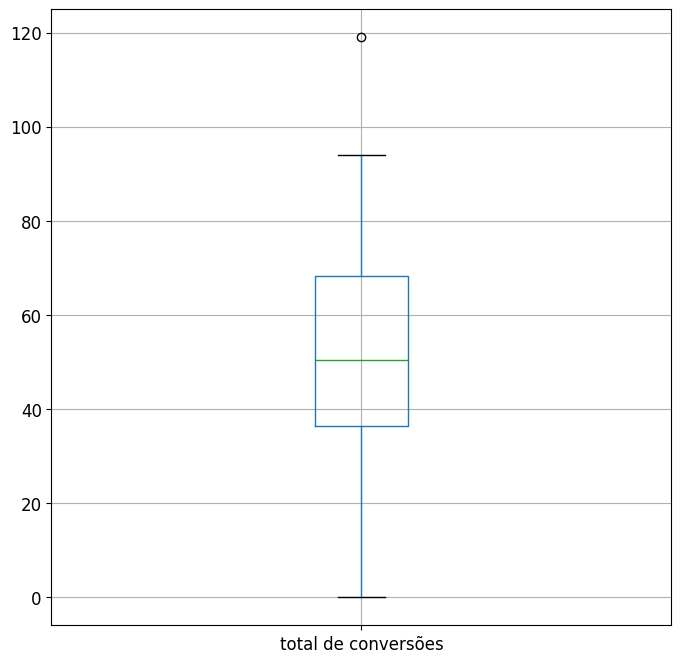

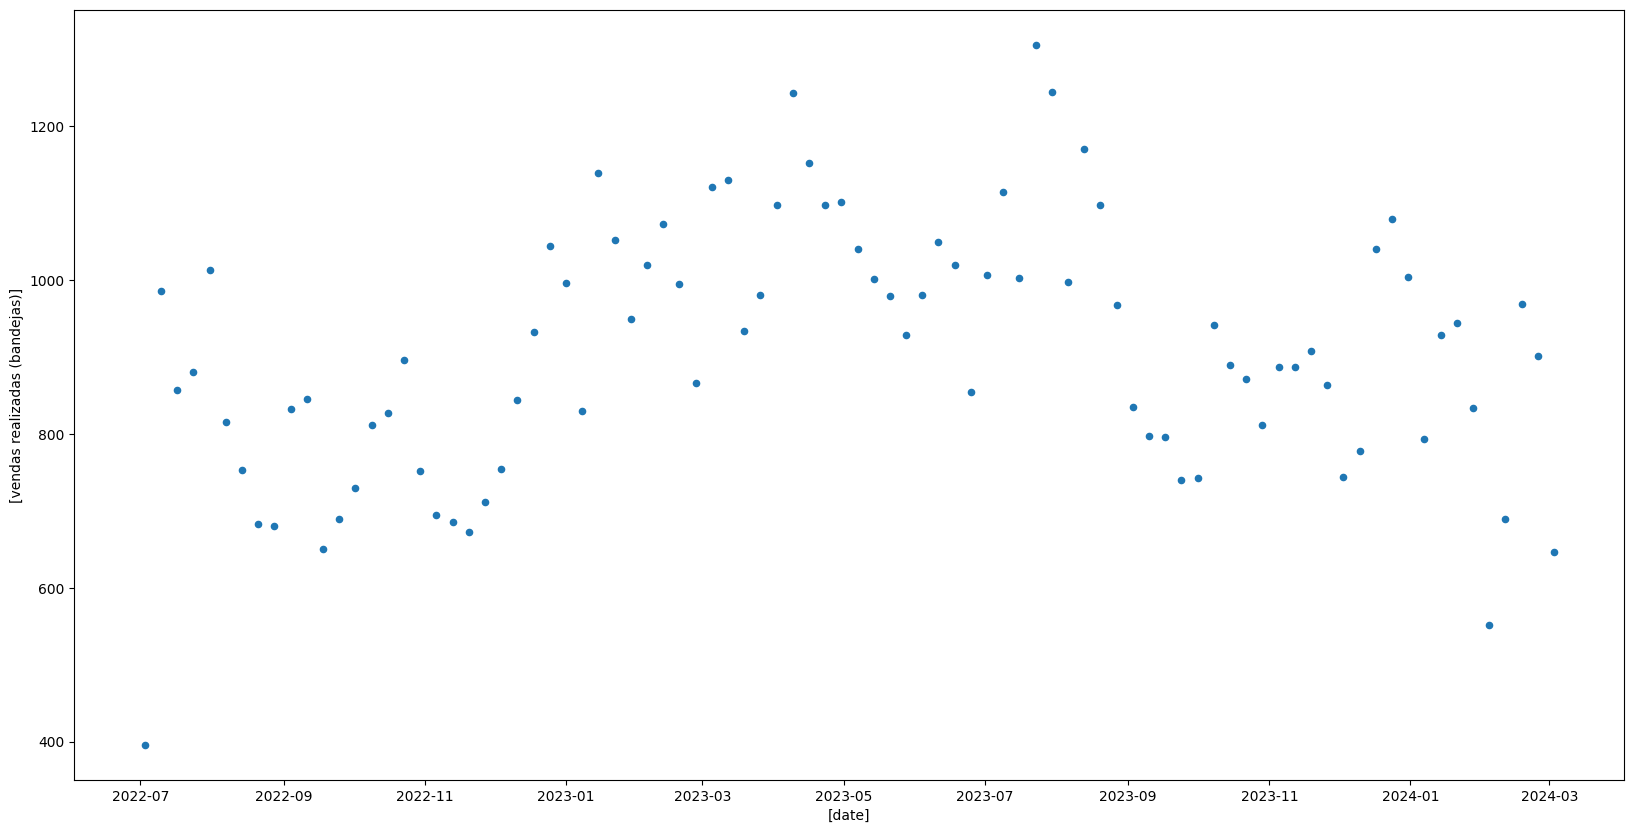

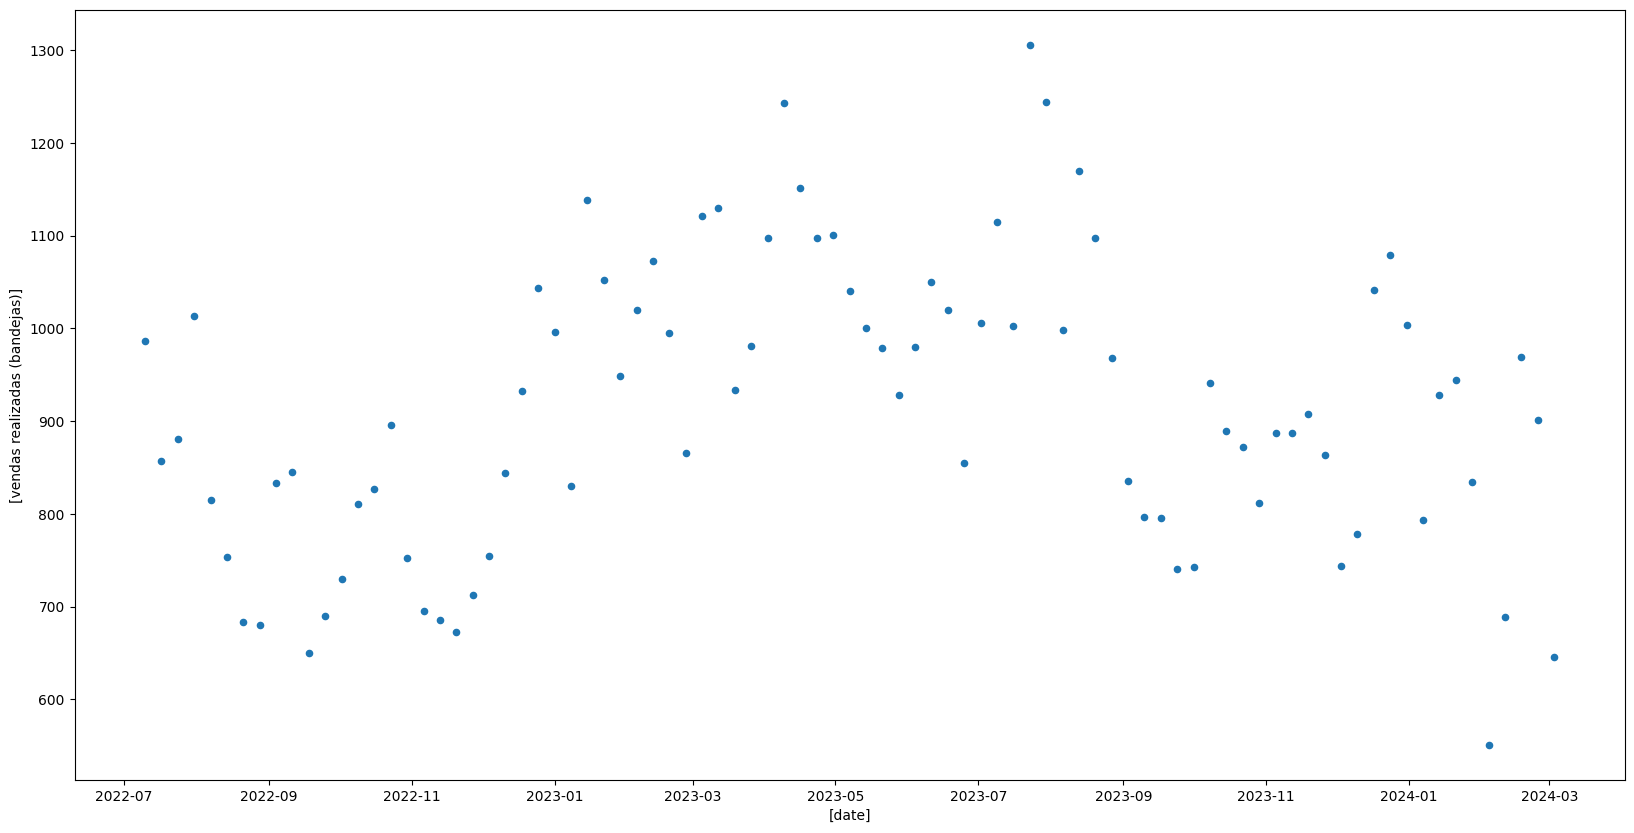

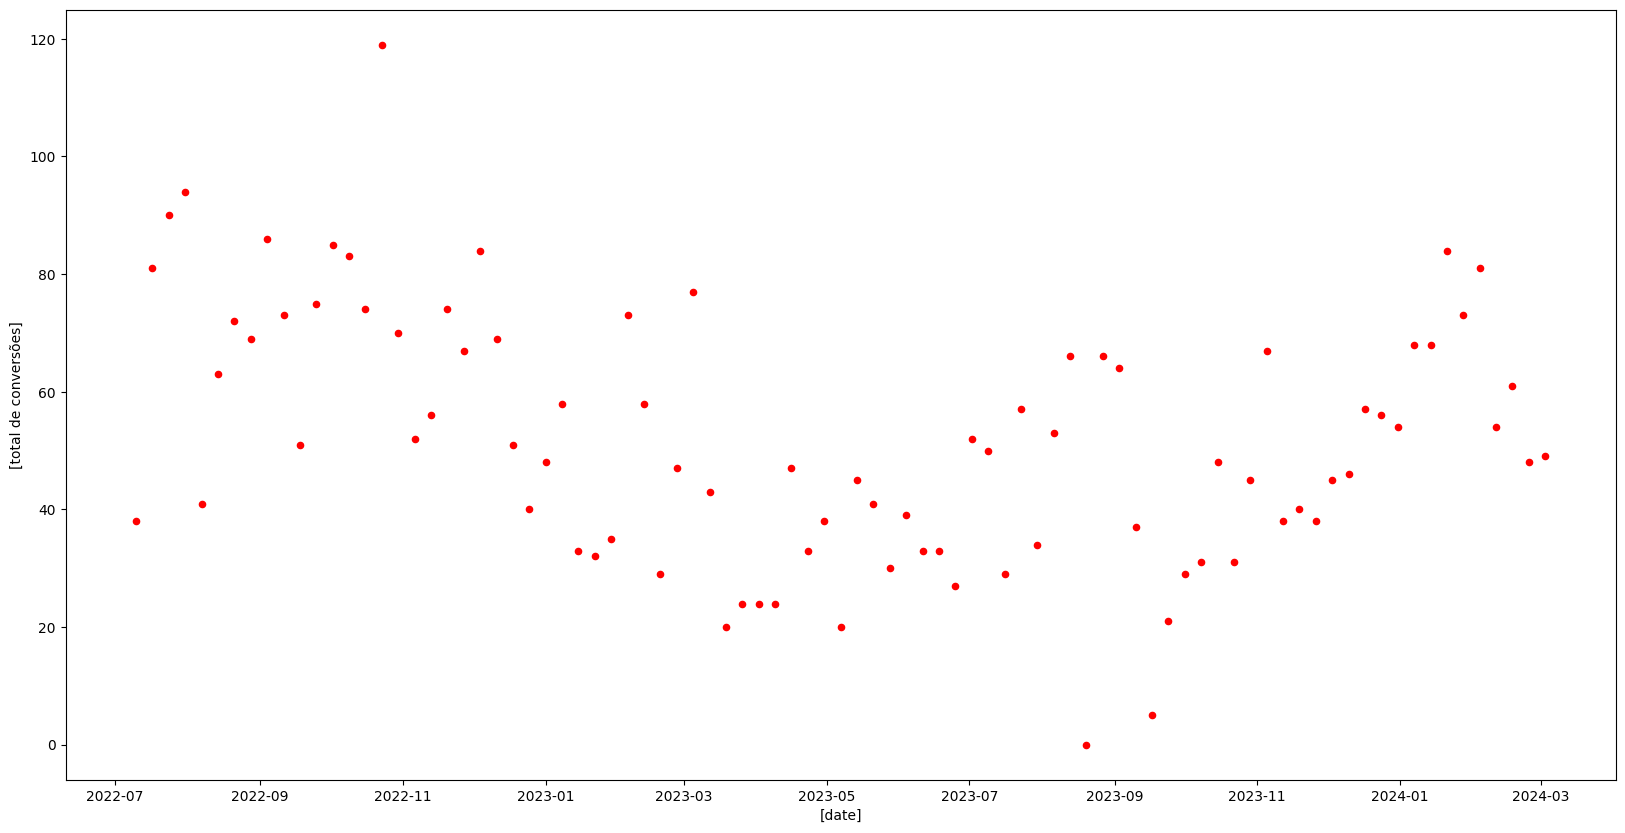

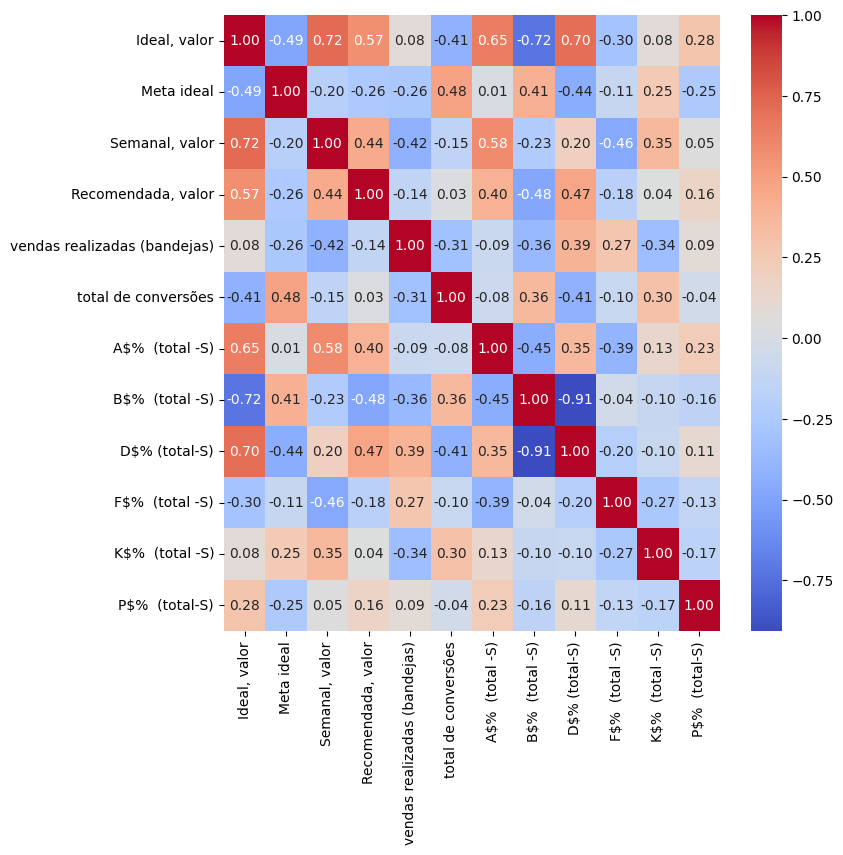

In [18]:
from matplotlib.colors import ListedColormap
corr_matrix = df_correlacao.corr(method = 'pearson') # Matriz de correlação
plt.figure(figsize=(8,8)) # Dimensionamento da figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = '.2f') # Mapa de calor + Matriz
plt.show()

Correlações muito fracas com total de conversão:

- P
- F
- Recomendada, valor

Correlações fracas com total de conversão:

- A
- K
- Semanal, valor

Correlações moderadas com total de conversão:

- Ideal, valor
- Meta, ideal
- vendas realizadas;
- B;
- D;

In [19]:
df_correlacao.columns

Index(['Ideal, valor', 'Meta ideal', 'Semanal, valor', 'Recomendada, valor',
       'vendas realizadas (bandejas)', 'total de conversões',
       'A$%  (total -S)', 'B$%  (total -S)', 'D$% (total-S)',
       'F$%  (total -S)', 'K$%  (total -S)', 'P$%  (total-S)'],
      dtype='object')

In [20]:
rotulos = df_correlacao['total de conversões'].to_frame()
atributos_moderados_e_fracos = df_correlacao.drop(labels = ['total de conversões', 'P$%  (total-S)', 'F$%  (total -S)', 'Recomendada, valor'], axis=1)
atributos_moderados = atributos_moderados_e_fracos.drop(labels = ['A$%  (total -S)', 'K$%  (total -S)', 'Semanal, valor'], axis = 1)

In [21]:
atributos_moderados_e_fracos

,"Ideal, valor",Meta ideal,"Semanal, valor",vendas realizadas (bandejas),A$% (total -S),B$% (total -S),D$% (total-S),K$% (total -S)
1,33.92,310,8.872677,986,0.018014,0.776228,0.001708,0.045275
2,33.92,310,8.836661,857,0.000000,0.806860,0.011273,0.039504
3,33.92,310,8.611724,881,0.022437,0.752758,0.010623,0.019410
4,33.92,310,8.719288,1013,0.021077,0.735729,0.047528,0.031998
5,41.34,254,10.839958,815,0.021321,0.765057,0.008083,0.023054
...,...,...,...,...,...,...,...,...
83,48.89,287,11.475168,551,0.029876,0.622207,0.142105,0.083818
84,48.89,287,12.088265,689,0.053406,0.641905,0.098007,0.071874
85,48.89,215,10.630913,969,0.048439,0.586140,0.156179,0.063809
86,51.54,204,11.733722,901,0.037268,0.621569,0.152033,0.048312


In [22]:
atributos_moderados_e_fracos.columns

Index(['Ideal, valor', 'Meta ideal', 'Semanal, valor',
       'vendas realizadas (bandejas)', 'A$%  (total -S)', 'B$%  (total -S)',
       'D$% (total-S)', 'K$%  (total -S)'],
      dtype='object')

In [23]:
atributos_moderados

,"Ideal, valor",Meta ideal,vendas realizadas (bandejas),B$% (total -S),D$% (total-S)
1,33.92,310,986,0.776228,0.001708
2,33.92,310,857,0.806860,0.011273
3,33.92,310,881,0.752758,0.010623
4,33.92,310,1013,0.735729,0.047528
5,41.34,254,815,0.765057,0.008083
...,...,...,...,...,...
83,48.89,287,551,0.622207,0.142105
84,48.89,287,689,0.641905,0.098007
85,48.89,215,969,0.586140,0.156179
86,51.54,204,901,0.621569,0.152033


In [24]:
atributos_moderados.columns

Index(['Ideal, valor', 'Meta ideal', 'vendas realizadas (bandejas)',
       'B$%  (total -S)', 'D$% (total-S)'],
      dtype='object')

In [25]:
rotulos

,total de conversões
1,38
2,81
3,90
4,94
5,41
...,...
83,81
84,54
85,61
86,48


## Modelagem

Modelo = transformador + estimador. Os transformadores personalizados serão aplicados ao data frame usando-se o FunctionTransformer, para que:

1. Eles sejam incluídos no Pipeline do ScikitLearn (o tratamento de dados seja automatizado sempre, a partir do data frame original);
3. Evitar rodar o mesmo código duas vezes (uma para treinamento, outra para teste);

In [26]:
df #a única modificação feita ao df original foi a tipagem da coluna de vendas realizadas (de float para int)

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,26,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2024,5,48.89,287,1221,11.475168,15.913512,551,81,7.233010,...,0.234714,-0.338665,0.029876,0.622207,0.142105,0.081085,0.083818,0.040909,0.013281,1.013281
84,2024,6,48.89,287,1159,12.088265,14.989052,689,54,11.746930,...,0.247254,0.249313,0.053406,0.641905,0.098007,0.095981,0.071874,0.038826,0.017334,1.017334
85,2024,7,48.89,215,988,10.630913,14.212922,969,61,0.000000,...,0.217446,0.406002,0.048439,0.586140,0.156179,0.089488,0.063809,0.055945,0.000000,1.000000
86,2024,8,51.54,204,895,11.733722,14.788333,901,48,5.710038,...,0.227662,-0.070159,0.037268,0.621569,0.152033,0.094610,0.048312,0.046208,0.006376,1.006376


### Criando funções transformadoras

In [27]:
def create_new_fields(df):
    dataset = df.copy()
    year = dataset['Ano']
    week = dataset['Semana']
    date_year_week = lambda x,y: create_date_from_year_week(x,y)
    date = list(map(date_year_week, year, week))
    dataset['date']= pd.Series(date)
    return dataset

def remove_outliers(df):
    dataset = df.copy()
    mask_outliers = dataset['vendas realizadas (bandejas)'] == 396
    dataset = dataset[~mask_outliers]
    return dataset

def select_labels(df):
    global rotulos_regressao
    dataset = df.copy()
    rotulos_regressao = dataset['total de conversões'].to_frame()
    return dataset

def select_moderate_and_weak_atributes(df, filter = False):
    dataset = df.copy()
    if filter:
        columns = ['Ideal, valor', 'Meta ideal', 'Semanal, valor', 'vendas realizadas (bandejas)', 'A$%  (total -S)', 'B$%  (total -S)', 'D$% (total-S)', 'K$%  (total -S)']
        return dataset[columns]
    else:
        return dataset.drop('total de conversões', axis = 'columns', errors = 'ignore')
    
def select_moderate_atributes(df, filter = False):
    dataset = df.copy()
    if filter:
        columns = ['Ideal, valor', 'Meta ideal', 'vendas realizadas (bandejas)', 'B$%  (total -S)', 'D$% (total-S)']
        return dataset[columns]
    else:
        return dataset.drop('total de conversões', axis = 'columns', errors = 'ignore')

In [28]:
from sklearn.preprocessing import FunctionTransformer
criar_novos_campos = FunctionTransformer(create_new_fields)
remocao_outliers = FunctionTransformer(remove_outliers)
selecionar_rotulos = FunctionTransformer(select_labels)
selecionar_atributos_moderados_e_fracos = FunctionTransformer(select_moderate_and_weak_atributes, kw_args={'filter': True})
selecionar_atributos_moderados = FunctionTransformer(select_moderate_atributes, kw_args={'filter': True})

### Criando os transformadores

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

transformador_moderados_e_fracos = Pipeline([
    ('criar novos campos', criar_novos_campos),
    ('remover outliers', remocao_outliers),
    ('selecionar rotulos', selecionar_rotulos),
    ('selecionar moderados e fracos', selecionar_atributos_moderados_e_fracos),
    ('normalizar os dados', RobustScaler())
])

transformador_moderados_somente = Pipeline([
    ('criar novos campos', criar_novos_campos),
    ('remover outliers', remocao_outliers),
    ('selecionar rotulos', selecionar_rotulos),
    ('selecionar moderados e fracos', selecionar_atributos_moderados),
    ('normalizar os dados', RobustScaler())
])


In [30]:
transformador_moderados_e_fracos.fit_transform(df)

array([[-1.50728477e+00,  2.88888889e+00, -1.21254257e+00,
         3.67058824e-01, -4.45707804e-01,  2.42301974e+00,
        -2.53822538e+00,  1.18388891e+00],
       [-1.50728477e+00,  2.88888889e+00, -1.24240246e+00,
        -2.40000000e-01, -1.81863525e+00,  3.01594843e+00,
        -2.35087752e+00,  8.16596642e-01],
       [-1.50728477e+00,  2.88888889e+00, -1.42889473e+00,
        -1.27058824e-01, -1.08602605e-01,  1.96873399e+00,
        -2.36361668e+00, -4.62300574e-01],
       [-1.50728477e+00,  2.88888889e+00, -1.33971511e+00,
         4.94117647e-01, -2.12261891e-01,  1.63911678e+00,
        -1.64077323e+00,  3.38848405e-01],
       [-5.24503311e-01,  8.14814815e-01,  4.18502236e-01,
        -4.37647059e-01, -1.93705902e-01,  2.20679052e+00,
        -2.41336021e+00, -2.30356147e-01],
       [-5.24503311e-01,  8.14814815e-01,  2.70646481e-01,
        -7.29411765e-01,  4.30058301e-01,  1.85226604e+00,
        -2.12114542e+00,  4.68826252e-01],
       [-5.24503311e-01,  8.148148

### Importando os estimadores e criando o fluxo final

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Regressão com atributos moderados e fracos
regressao_atr_mod_fraco = Pipeline([
    ('transformer', transformador_moderados_e_fracos),
    ('Regressão linear atr. moderados e fracos', LinearRegression())
])

svr_polynomial_mod_fraco = Pipeline([
    ('transformer', transformador_moderados_e_fracos),
    ('SVR Polinomial atr. moderados e fracos', SVR(kernel='poly', degree = 3))
])

arvore_decisao_atr_mod_fraco = Pipeline([
    ('transformer', transformador_moderados_e_fracos),
    ('Árvore atr. moderados e fracos', DecisionTreeRegressor(max_depth=3))
])

floresta_atr_mod_fraco = Pipeline([
    ('transformer', transformador_moderados_e_fracos),
    ('Floresta atr. moderados e fracos', RandomForestRegressor())
])

modelos_atr_mod_e_fracos = [
    regressao_atr_mod_fraco,
    svr_polynomial_mod_fraco,
    arvore_decisao_atr_mod_fraco,
    floresta_atr_mod_fraco
]

#Regressão somente com atributos de corerlação moderada
regressao_only_mod = Pipeline([
    ('transformer', transformador_moderados_somente),
    ('Reg. lin. só atr. mod', LinearRegression())
])

svr_polynomial_only_mod = Pipeline([
    ('transformer', transformador_moderados_somente),
    ('SVR pol. só atr. mod.', SVR(kernel='poly', degree = 3))
])

arvore_decisao_only_mod= Pipeline([
    ('transformer', transformador_moderados_somente),
    ('Árvore só atr. mod.', DecisionTreeRegressor(max_depth=3))
])

floresta_only_mod = Pipeline([
    ('transformer', transformador_moderados_somente),
    ('Floresta só atr. mod.', RandomForestRegressor())
])

modelos_only_mod = [
    regressao_only_mod,
    svr_polynomial_only_mod,
    arvore_decisao_only_mod,
    floresta_only_mod
]


### Train, test, validation splits

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [33]:
rotulos_regressao

,total de conversões
1,38
2,81
3,90
4,94
5,41
...,...
83,81
84,54
85,61
86,48


In [34]:
df

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,26,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2024,5,48.89,287,1221,11.475168,15.913512,551,81,7.233010,...,0.234714,-0.338665,0.029876,0.622207,0.142105,0.081085,0.083818,0.040909,0.013281,1.013281
84,2024,6,48.89,287,1159,12.088265,14.989052,689,54,11.746930,...,0.247254,0.249313,0.053406,0.641905,0.098007,0.095981,0.071874,0.038826,0.017334,1.017334
85,2024,7,48.89,215,988,10.630913,14.212922,969,61,0.000000,...,0.217446,0.406002,0.048439,0.586140,0.156179,0.089488,0.063809,0.055945,0.000000,1.000000
86,2024,8,51.54,204,895,11.733722,14.788333,901,48,5.710038,...,0.227662,-0.070159,0.037268,0.621569,0.152033,0.094610,0.048312,0.046208,0.006376,1.006376


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(remove_outliers(df), rotulos_regressao, test_size=0.2, random_state=0)
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
#X_train_only_mod, X_test_only_mod, y_train, y_test = train_test_split(atributos_moderados, rotulos, test_size=0.2, random_state=0)

In [36]:
X_train

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
76,2023,50,48.89,215,899,11.684642,14.741700,1041,57,24.877099,...,0.238999,0.338353,0.035834,0.616002,0.151029,0.113227,0.050197,0.033709,0.024474,1.024474
43,2023,17,45.30,232,1077,9.753013,12.273421,1101,38,83.768981,...,0.215298,0.002859,0.027037,0.619053,0.155306,0.121544,0.025780,0.051279,0.082295,1.082295
23,2022,49,40.58,259,1069,9.830712,13.701739,844,69,15.156583,...,0.242255,0.117442,0.014540,0.642465,0.156417,0.116922,0.033593,0.036064,0.018282,1.018282
7,2022,33,41.34,254,1008,10.424412,12.317361,683,72,12.374799,...,0.252163,0.000000,0.016152,0.754748,0.046863,0.123150,0.023517,0.035571,0.018442,1.018442
62,2023,36,48.89,215,911,11.535195,13.738016,797,37,0.000000,...,0.235942,-0.046401,0.018261,0.637350,0.146998,0.115551,0.036387,0.045453,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2024,6,48.89,287,1159,12.088265,14.989052,689,54,11.746930,...,0.247254,0.249313,0.053406,0.641905,0.098007,0.095981,0.071874,0.038826,0.017334,1.017334
68,2023,42,48.89,287,1248,11.221235,13.777216,872,31,2.495269,...,0.229520,-0.019471,0.034807,0.682038,0.135985,0.081806,0.020793,0.044571,0.002869,1.002869
65,2023,39,48.89,215,916,11.464339,14.698408,743,29,0.000000,...,0.234493,0.005021,0.020542,0.649097,0.125122,0.124364,0.029507,0.051369,0.000000,1.000000
48,2023,22,45.35,232,981,10.709343,13.716667,980,39,39.684973,...,0.236149,0.055615,0.023862,0.681804,0.099909,0.115747,0.036047,0.042631,0.042189,1.042189


In [37]:
Y_train.shape

(69, 1)

### Metrics

In [38]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

## Treinamento

In [39]:
from time import time

resultados_mod_e_fracos = {
    'nome': [],
    'tempo': [],
    'RMSE_Treino': [],
    'MAE_Treino': []
}
for modelo in modelos_atr_mod_e_fracos:
    print()
    start = time()
    #treino
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_mod_e_fracos['nome'].append(nome)

    modelo.fit(X_train, np.ravel(Y_train)) #treinamento
    predicao = modelo.predict(X_train) #previsão
    metrica = mse(Y_train, predicao, squared=False)
    resultados_mod_e_fracos['RMSE_Treino'].append(metrica)
    print(f'RMSE: {metrica}')

    metrica = mae(Y_train, predicao)
    resultados_mod_e_fracos['MAE_Treino'].append(metrica)
    print(f'MAE: {metrica}')

    stop = time()
    tempo = stop - start #cronômetro
    resultados_mod_e_fracos['tempo'].append(tempo)
    print(f'Tempo Treinamento: {tempo}')


Nome: Regressão linear atr. moderados e fracos
RMSE: 17.517749076014127
MAE: 13.39121607175702
Tempo Treinamento: 0.0205690860748291

Nome: SVR Polinomial atr. moderados e fracos
RMSE: 19.529025320415972
MAE: 14.924710583929228
Tempo Treinamento: 0.019988298416137695

Nome: Árvore atr. moderados e fracos
RMSE: 12.995124161411695
MAE: 9.339859310111027
Tempo Treinamento: 0.02190089225769043

Nome: Floresta atr. moderados e fracos
RMSE: 6.969388553638991
MAE: 5.415072463768115
Tempo Treinamento: 0.30207395553588867


In [40]:
resultados_mod_e_fracos = pd.DataFrame(resultados_mod_e_fracos)
resultados_mod_e_fracos

,nome,tempo,RMSE_Treino,MAE_Treino
0,Regressão linear atr. moderados e fracos,0.020569,17.517749,13.391216
1,SVR Polinomial atr. moderados e fracos,0.019988,19.529025,14.924711
2,Árvore atr. moderados e fracos,0.021901,12.995124,9.339859
3,Floresta atr. moderados e fracos,0.302074,6.969389,5.415072


In [41]:
resultados_mod_e_fracos.sort_values(by='RMSE_Treino')

,nome,tempo,RMSE_Treino,MAE_Treino
3,Floresta atr. moderados e fracos,0.302074,6.969389,5.415072
2,Árvore atr. moderados e fracos,0.021901,12.995124,9.339859
0,Regressão linear atr. moderados e fracos,0.020569,17.517749,13.391216
1,SVR Polinomial atr. moderados e fracos,0.019988,19.529025,14.924711


In [42]:
resultados_only_mod = {
    'nome': [],
    'tempo': [],
    'RMSE_Treino': [],
    'MAE_Treino': []
}
for modelo in modelos_only_mod:
    print()
    start = time()
    #treino
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_only_mod['nome'].append(nome)

    modelo.fit(X_train, np.ravel(Y_train)) #treinamento
    predicao = modelo.predict(X_train) #previsão
    metrica = mse(Y_train, predicao, squared=False)
    resultados_only_mod['RMSE_Treino'].append(metrica)
    print(f'RMSE: {metrica}')

    metrica = mae(Y_train, predicao)
    resultados_only_mod['MAE_Treino'].append(metrica)
    print(f'MAE: {metrica}')

    stop = time()
    tempo = stop - start #cronômetro
    resultados_only_mod['tempo'].append(tempo)
    print(f'Tempo Treinamento: {tempo}')


Nome: Reg. lin. só atr. mod
RMSE: 18.01721257539465
MAE: 14.438751786137937
Tempo Treinamento: 0.04046010971069336

Nome: SVR pol. só atr. mod.
RMSE: 19.63389338438696
MAE: 15.560016323313432
Tempo Treinamento: 0.02104973793029785

Nome: Árvore só atr. mod.
RMSE: 15.218726912243069
MAE: 11.623266443701226
Tempo Treinamento: 0.0213165283203125

Nome: Floresta só atr. mod.
RMSE: 7.7934377821195255
MAE: 6.064637681159419
Tempo Treinamento: 0.28588294982910156


In [43]:
resultados_only_mod = pd.DataFrame(resultados_only_mod)
resultados_only_mod

,nome,tempo,RMSE_Treino,MAE_Treino
0,Reg. lin. só atr. mod,0.040460,18.017213,14.438752
1,SVR pol. só atr. mod.,0.021050,19.633893,15.560016
2,Árvore só atr. mod.,0.021317,15.218727,11.623266
3,Floresta só atr. mod.,0.285883,7.793438,6.064638


In [44]:
resultados_only_mod.sort_values(by='RMSE_Treino')

,nome,tempo,RMSE_Treino,MAE_Treino
3,Floresta só atr. mod.,0.285883,7.793438,6.064638
2,Árvore só atr. mod.,0.021317,15.218727,11.623266
0,Reg. lin. só atr. mod,0.040460,18.017213,14.438752
1,SVR pol. só atr. mod.,0.021050,19.633893,15.560016


## Teste

In [45]:
resultados_teste_mod_e_fracos = {
    'nome': [],
    'tempo': [],
    'RMSE_Treino': [],
    'MAE_Treino': []
}
for modelo in modelos_atr_mod_e_fracos:
    print()
    start = time()
    # Teste
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_teste_mod_e_fracos['nome'].append(nome)

    #modelo.fit(X_train, Y_train) #NÃO SE TREINA MODELO PARA O TESTE
    predicao = modelo.predict(X_test) #previsão
    metrica = mse(Y_test, predicao, squared=False)
    resultados_teste_mod_e_fracos['RMSE_Treino'].append(metrica)
    print(f'RMSE: {metrica}')

    metrica = mae(Y_test, predicao)
    resultados_teste_mod_e_fracos['MAE_Treino'].append(metrica)
    print(f'MAE: {metrica}')

    stop = time()
    tempo = stop - start #cronômetro
    resultados_teste_mod_e_fracos['tempo'].append(tempo)
    print(f'Tempo Treinamento: {tempo}')


Nome: Regressão linear atr. moderados e fracos
RMSE: 14.791530844178379
MAE: 12.552144680851079
Tempo Treinamento: 0.011687040328979492

Nome: SVR Polinomial atr. moderados e fracos
RMSE: 19.41314418247313
MAE: 15.765732666711845
Tempo Treinamento: 0.014024019241333008

Nome: Árvore atr. moderados e fracos
RMSE: 19.66633479778658
MAE: 16.28589993502274
Tempo Treinamento: 0.01262044906616211

Nome: Floresta atr. moderados e fracos
RMSE: 17.971487757618238
MAE: 14.661666666666665
Tempo Treinamento: 0.016613245010375977


In [46]:
resultados_teste_mod_e_fracos = pd.DataFrame(resultados_teste_mod_e_fracos)
resultados_teste_mod_e_fracos

,nome,tempo,RMSE_Treino,MAE_Treino
0,Regressão linear atr. moderados e fracos,0.011687,14.791531,12.552145
1,SVR Polinomial atr. moderados e fracos,0.014024,19.413144,15.765733
2,Árvore atr. moderados e fracos,0.012620,19.666335,16.285900
3,Floresta atr. moderados e fracos,0.016613,17.971488,14.661667


In [47]:
resultados_teste_mod_e_fracos.sort_values(by='RMSE_Treino')

,nome,tempo,RMSE_Treino,MAE_Treino
0,Regressão linear atr. moderados e fracos,0.011687,14.791531,12.552145
3,Floresta atr. moderados e fracos,0.016613,17.971488,14.661667
1,SVR Polinomial atr. moderados e fracos,0.014024,19.413144,15.765733
2,Árvore atr. moderados e fracos,0.012620,19.666335,16.285900


## Cross Validation

### Single model

In [48]:
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [49]:
#define predictor and response variables: X_Train, Y_train

#define cross validation method to use
from sklearn.model_selection import ShuffleSplit

shuffle = ShuffleSplit(n_splits=500, test_size=0.15)



In [50]:
#build regression model
modelo = regressao_only_mod

from sklearn.model_selection import cross_validate

#use shufflesplit to evaluate model
cv_results = cross_validate(modelo, X_train, Y_train, scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error'), cv=shuffle, n_jobs=-1)

#get columns names
cv_results = pd.DataFrame(cv_results) 
cv_results.columns


Index(['fit_time', 'score_time', 'test_neg_root_mean_squared_error',
       'test_neg_mean_absolute_error'],
      dtype='object')

In [51]:
#consolidate results
cv_results['total_time'] = cv_results['fit_time'] + cv_results['score_time']
Total_time = sum(cv_results['total_time'])


In [52]:

#calculate metrics
RMSE = mean(absolute(cv_results['test_neg_root_mean_squared_error']))
MAE = mean(absolute(cv_results['test_neg_mean_absolute_error']))

Total_time, RMSE, MAE

(18.720370769500732, 19.480050865208877, 16.030690167130853)

### All models

In [53]:
resultados_cross_only_mod = {
    'nome': [],
    'tempo': [],
    'RMSE_Cross': [],
    'MAE_Cross': []
}

for modelo in modelos_only_mod:
    print()
    # Teste
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_cross_only_mod['nome'].append(nome)
    
    #this step does model fitting & testing in accordance to cross validation procedure
    cv_results = cross_validate(modelo, X_train, Y_train, scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error'), cv=shuffle, n_jobs=-1)
    
    #consolidate results
    cv_results['total_time'] = cv_results['fit_time'] + cv_results['score_time']
    Total_time = sum(cv_results['total_time'])
    
    #calculate metrics
    RMSE = mean(absolute(cv_results['test_neg_root_mean_squared_error']))
    MAE = mean(absolute(cv_results['test_neg_mean_absolute_error']))

    resultados_cross_only_mod['RMSE_Cross'].append(RMSE)
    print(f'RMSE: {RMSE}')
    
    resultados_cross_only_mod['MAE_Cross'].append(MAE)
    print(f'MAE: {MAE}')

    resultados_cross_only_mod['tempo'].append(Total_time)
    print(f'Tempo Treinamento: {Total_time}')


Nome: Reg. lin. só atr. mod


RMSE: 19.396868183866818
MAE: 15.952929316843486
Tempo Treinamento: 23.4446542263031

Nome: SVR pol. só atr. mod.
RMSE: 21.46062287201493
MAE: 17.59871534808037
Tempo Treinamento: 18.29429030418396

Nome: Árvore só atr. mod.
RMSE: 22.932124927719986
MAE: 18.686740642706432
Tempo Treinamento: 18.04007625579834

Nome: Floresta só atr. mod.
RMSE: 20.142115550756913
MAE: 16.407867272727273
Tempo Treinamento: 190.66367936134338


In [54]:
resultados_cross_only_mod = pd.DataFrame(resultados_cross_only_mod)
resultados_cross_only_mod

,nome,tempo,RMSE_Cross,MAE_Cross
0,Reg. lin. só atr. mod,23.444654,19.396868,15.952929
1,SVR pol. só atr. mod.,18.294290,21.460623,17.598715
2,Árvore só atr. mod.,18.040076,22.932125,18.686741
3,Floresta só atr. mod.,190.663679,20.142116,16.407867


In [55]:
resultados_cross_only_mod.sort_values(by='RMSE_Cross')

,nome,tempo,RMSE_Cross,MAE_Cross
0,Reg. lin. só atr. mod,23.444654,19.396868,15.952929
3,Floresta só atr. mod.,190.663679,20.142116,16.407867
1,SVR pol. só atr. mod.,18.294290,21.460623,17.598715
2,Árvore só atr. mod.,18.040076,22.932125,18.686741


In [56]:
resultados_cross_mod_e_fraco = {
    'nome': [],
    'tempo': [],
    'RMSE_Cross': [],
    'MAE_Cross': []
}

for modelo in modelos_atr_mod_e_fracos:
    print()
    # Teste
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_cross_mod_e_fraco['nome'].append(nome)
    
    #this step does model fitting & testing in accordance to cross validation procedure
    cv_results = cross_validate(modelo, X_train, Y_train, scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error'), cv=shuffle, n_jobs=-1)
    
    #consolidate results
    cv_results['total_time'] = cv_results['fit_time'] + cv_results['score_time']
    Total_time = sum(cv_results['total_time'])
    
    #calculate metrics
    RMSE = mean(absolute(cv_results['test_neg_root_mean_squared_error']))
    MAE = mean(absolute(cv_results['test_neg_mean_absolute_error']))

    resultados_cross_mod_e_fraco['RMSE_Cross'].append(RMSE)
    print(f'RMSE: {RMSE}')
    
    resultados_cross_mod_e_fraco['MAE_Cross'].append(MAE)
    print(f'MAE: {MAE}')

    resultados_cross_mod_e_fraco['tempo'].append(Total_time)
    print(f'Tempo Treinamento: {Total_time}')


Nome: Regressão linear atr. moderados e fracos


RMSE: 20.038295039836296
MAE: 15.80767101651551
Tempo Treinamento: 18.751220226287842

Nome: SVR Polinomial atr. moderados e fracos
RMSE: 21.124664101497153
MAE: 17.1688595851063
Tempo Treinamento: 18.684006452560425

Nome: Árvore atr. moderados e fracos
RMSE: 20.640997714710736
MAE: 16.29096353192102
Tempo Treinamento: 18.402036905288696

Nome: Floresta atr. moderados e fracos
RMSE: 18.204180804008267
MAE: 14.654098181818183
Tempo Treinamento: 218.21323037147522


In [57]:
resultados_cross_mod_e_fraco = pd.DataFrame(resultados_cross_mod_e_fraco)
resultados_cross_mod_e_fraco

,nome,tempo,RMSE_Cross,MAE_Cross
0,Regressão linear atr. moderados e fracos,18.751220,20.038295,15.807671
1,SVR Polinomial atr. moderados e fracos,18.684006,21.124664,17.168860
2,Árvore atr. moderados e fracos,18.402037,20.640998,16.290964
3,Floresta atr. moderados e fracos,218.213230,18.204181,14.654098


In [58]:
resultados_cross_mod_e_fraco.sort_values(by='RMSE_Cross')

,nome,tempo,RMSE_Cross,MAE_Cross
3,Floresta atr. moderados e fracos,218.213230,18.204181,14.654098
0,Regressão linear atr. moderados e fracos,18.751220,20.038295,15.807671
2,Árvore atr. moderados e fracos,18.402037,20.640998,16.290964
1,SVR Polinomial atr. moderados e fracos,18.684006,21.124664,17.168860


In [59]:
test_df_copy = df.copy()
test_df_copy = remove_outliers(test_df_copy)
test_df_copy

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
5,2022,31,41.34,254,969,10.839958,10.653415,815,41,28.228892,...,0.262215,-0.194779,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647,0.035847,1.035847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2024,5,48.89,287,1221,11.475168,15.913512,551,81,7.233010,...,0.234714,-0.338665,0.029876,0.622207,0.142105,0.081085,0.083818,0.040909,0.013281,1.013281
84,2024,6,48.89,287,1159,12.088265,14.989052,689,54,11.746930,...,0.247254,0.249313,0.053406,0.641905,0.098007,0.095981,0.071874,0.038826,0.017334,1.017334
85,2024,7,48.89,215,988,10.630913,14.212922,969,61,0.000000,...,0.217446,0.406002,0.048439,0.586140,0.156179,0.089488,0.063809,0.055945,0.000000,1.000000
86,2024,8,51.54,204,895,11.733722,14.788333,901,48,5.710038,...,0.227662,-0.070159,0.037268,0.621569,0.152033,0.094610,0.048312,0.046208,0.006376,1.006376


In [60]:
resultados_teste_df = {
    'nome': [],
    'tempo': [],
    'RMSE_Treino': [],
    'MAE_Treino': []
}
for modelo in modelos_atr_mod_e_fracos:
    print()
    start = time()
    # Teste
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_teste_df['nome'].append(nome)

    #NÃO SE TREINA MODELO PARA O TESTE
    predicao = modelo.predict(test_df_copy) #previsão
    metrica = mse(test_df_copy['total de conversões'], predicao, squared=False)
    resultados_teste_df['RMSE_Treino'].append(metrica)
    print(f'RMSE: {metrica}')

    metrica = mae(test_df_copy['total de conversões'], predicao)
    resultados_teste_df['MAE_Treino'].append(metrica)
    print(f'MAE: {metrica}')

    stop = time()
    tempo = stop - start #cronômetro
    resultados_teste_df['tempo'].append(tempo)
    print(f'Tempo Treinamento: {tempo}')


Nome: Regressão linear atr. moderados e fracos
RMSE: 16.989633309919373
MAE: 13.217615094328206
Tempo Treinamento: 0.007292509078979492

Nome: SVR Polinomial atr. moderados e fracos
RMSE: 19.50510639727564
MAE: 15.098715152780807
Tempo Treinamento: 0.008069276809692383

Nome: Árvore atr. moderados e fracos
RMSE: 14.62717492415546
MAE: 10.776971163541038
Tempo Treinamento: 0.0070455074310302734

Nome: Floresta atr. moderados e fracos
RMSE: 10.26378114771919
MAE: 7.328160919540231
Tempo Treinamento: 0.013941049575805664


In [61]:
resultados_teste_df = pd.DataFrame(resultados_teste_df)
resultados_teste_df

,nome,tempo,RMSE_Treino,MAE_Treino
0,Regressão linear atr. moderados e fracos,0.007293,16.989633,13.217615
1,SVR Polinomial atr. moderados e fracos,0.008069,19.505106,15.098715
2,Árvore atr. moderados e fracos,0.007046,14.627175,10.776971
3,Floresta atr. moderados e fracos,0.013941,10.263781,7.328161


In [62]:
resultados_teste_df.sort_values(by='RMSE_Treino')

,nome,tempo,RMSE_Treino,MAE_Treino
3,Floresta atr. moderados e fracos,0.013941,10.263781,7.328161
2,Árvore atr. moderados e fracos,0.007046,14.627175,10.776971
0,Regressão linear atr. moderados e fracos,0.007293,16.989633,13.217615
1,SVR Polinomial atr. moderados e fracos,0.008069,19.505106,15.098715


In [63]:
predicao_floresta = floresta_atr_mod_fraco.predict(test_df_copy)
predicao_floresta

array([ 54.6 ,  76.69,  56.85,  78.44,  47.64,  64.8 ,  63.74,  57.77,
        58.73,  65.83,  55.33,  72.2 ,  81.67,  68.59,  73.21, 101.29,
        59.32,  55.06,  58.76,  72.43,  63.27,  76.16,  77.46,  56.07,
        56.22,  58.56,  35.17,  37.33,  31.71,  31.66,  36.74,  52.  ,
        35.92,  33.1 ,  61.56,  44.13,  22.3 ,  28.41,  28.54,  29.84,
        49.29,  39.06,  37.34,  44.63,  44.45,  38.8 ,  34.38,  40.9 ,
        33.23,  35.07,  33.71,  49.74,  48.64,  38.85,  46.85,  37.93,
        39.56,  55.23,  18.21,  57.02,  55.95,  34.53,  17.59,  20.01,
        26.1 ,  39.43,  49.47,  39.47,  50.97,  59.22,  40.86,  42.43,
        41.17,  44.05,  45.12,  53.37,  38.75,  47.38,  67.21,  67.68,
        72.42,  70.21,  72.94,  59.93,  55.98,  48.61,  51.07])

In [64]:
test_df_copy['predicao floresta'] = predicao_floresta
test_df_copy

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S),predicao floresta
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888,54.60
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776,76.69
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450,56.85
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930,78.44
5,2022,31,41.34,254,969,10.839958,10.653415,815,41,28.228892,...,-0.194779,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647,0.035847,1.035847,47.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2024,5,48.89,287,1221,11.475168,15.913512,551,81,7.233010,...,-0.338665,0.029876,0.622207,0.142105,0.081085,0.083818,0.040909,0.013281,1.013281,72.94
84,2024,6,48.89,287,1159,12.088265,14.989052,689,54,11.746930,...,0.249313,0.053406,0.641905,0.098007,0.095981,0.071874,0.038826,0.017334,1.017334,59.93
85,2024,7,48.89,215,988,10.630913,14.212922,969,61,0.000000,...,0.406002,0.048439,0.586140,0.156179,0.089488,0.063809,0.055945,0.000000,1.000000,55.98
86,2024,8,51.54,204,895,11.733722,14.788333,901,48,5.710038,...,-0.070159,0.037268,0.621569,0.152033,0.094610,0.048312,0.046208,0.006376,1.006376,48.61


In [65]:
pd.DataFrame.to_csv(test_df_copy, 'previsao_floresta.csv', sep =';', decimal = ',')